# **Departamento de Marketing**

# **Importação de Biblioteca e Base de dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Carregando a base de dados
creditcard_df = pd.read_csv("/content/Marketing_data.csv")

In [3]:
# vendo o tamanho da base de dados
creditcard_df.shape

(8950, 18)

In [4]:
# visualizando as 5 linhas primeira
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# fazer um describe para ver valores maximo, median, minima
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Vamos filtra a pessoa com valor maximo de ONEOFF_PURCHASES
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
creditcard_df['CASH_ADVANCE'].max()


47137.21176

In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE']== 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# **Visualização e exploração dos dados**

In [9]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

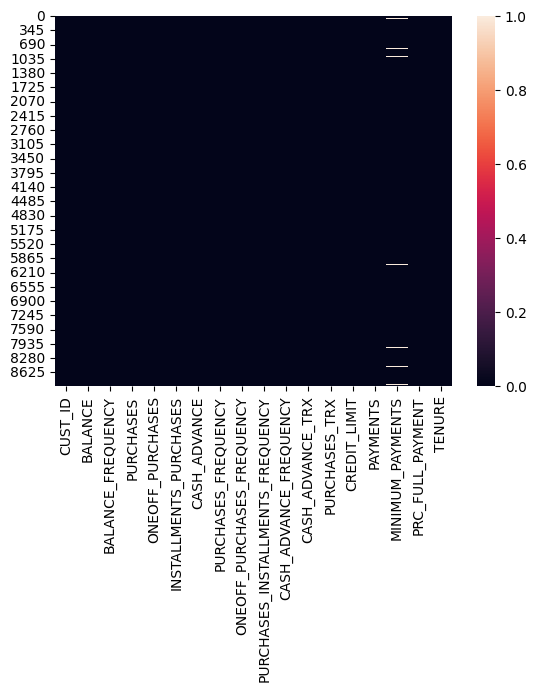

In [10]:
# heatmap
sns.heatmap(creditcard_df.isnull());

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()== True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

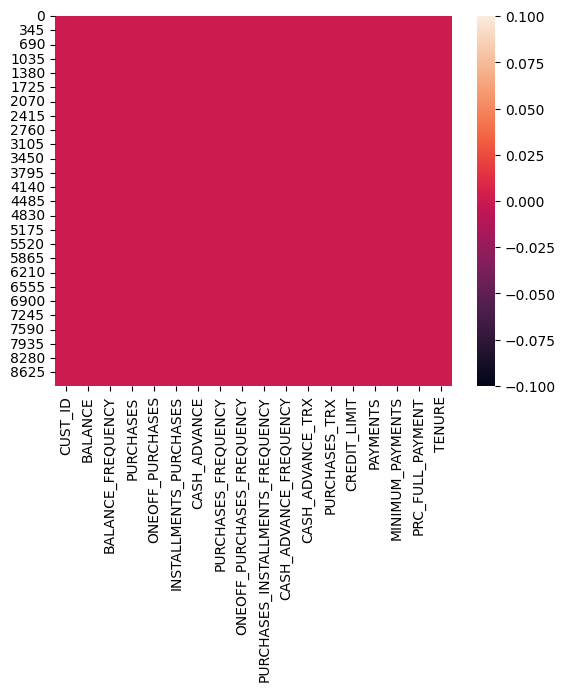

In [17]:
# heatmap
sns.heatmap(creditcard_df.isnull());

In [18]:
creditcard_df.duplicated().sum()

0

In [19]:
creditcard_df.drop('CUST_ID', axis= 1, inplace=True)

In [20]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-22-5794aba77f1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-22-5794aba77f1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-22-5794aba77f

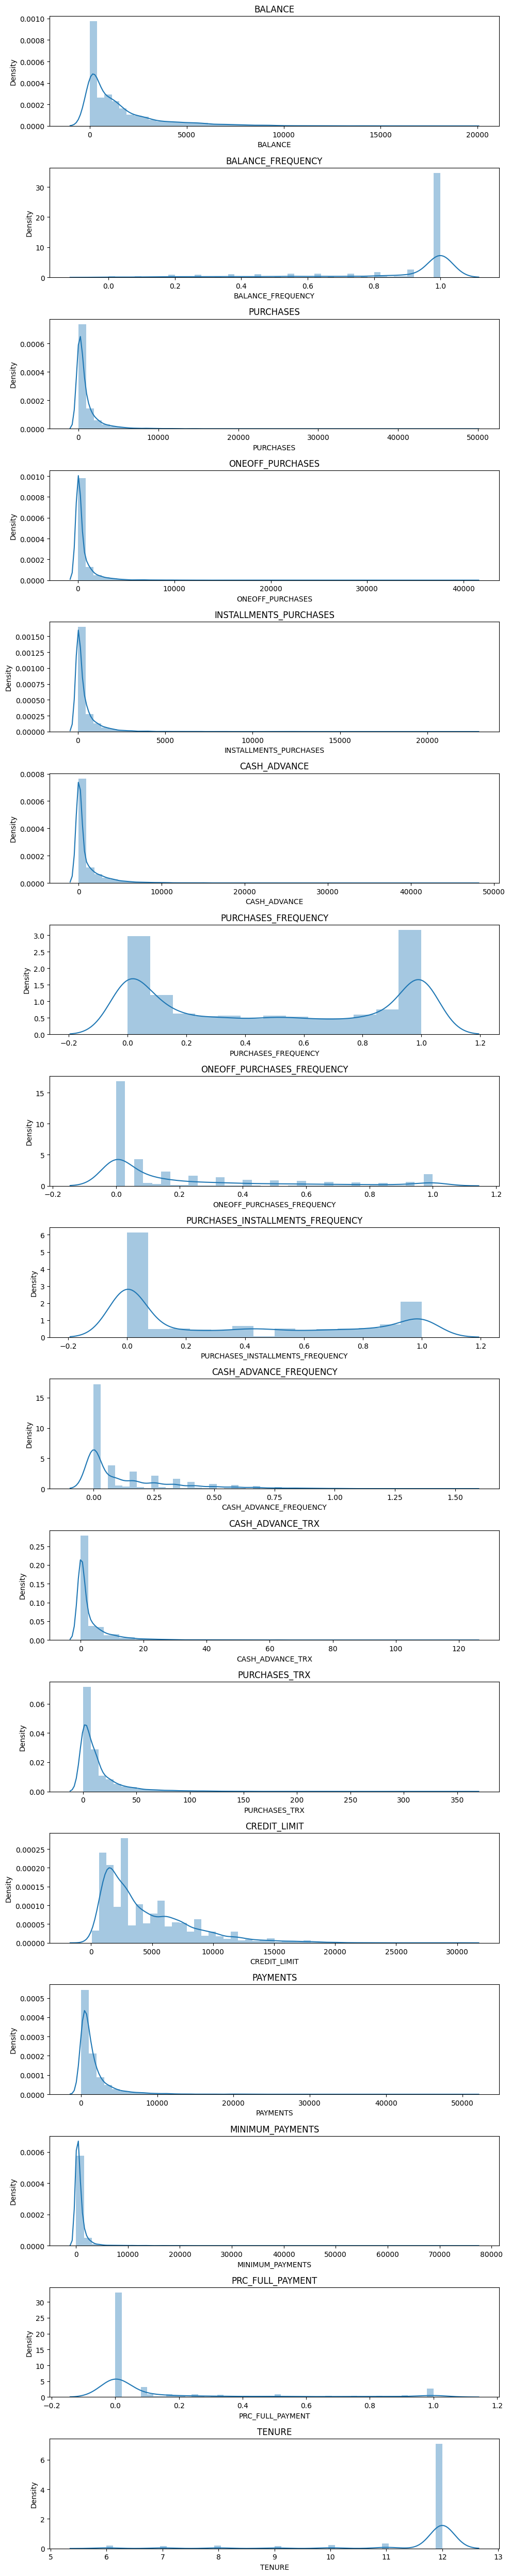

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [23]:
correlations = creditcard_df.corr()

<Axes: >

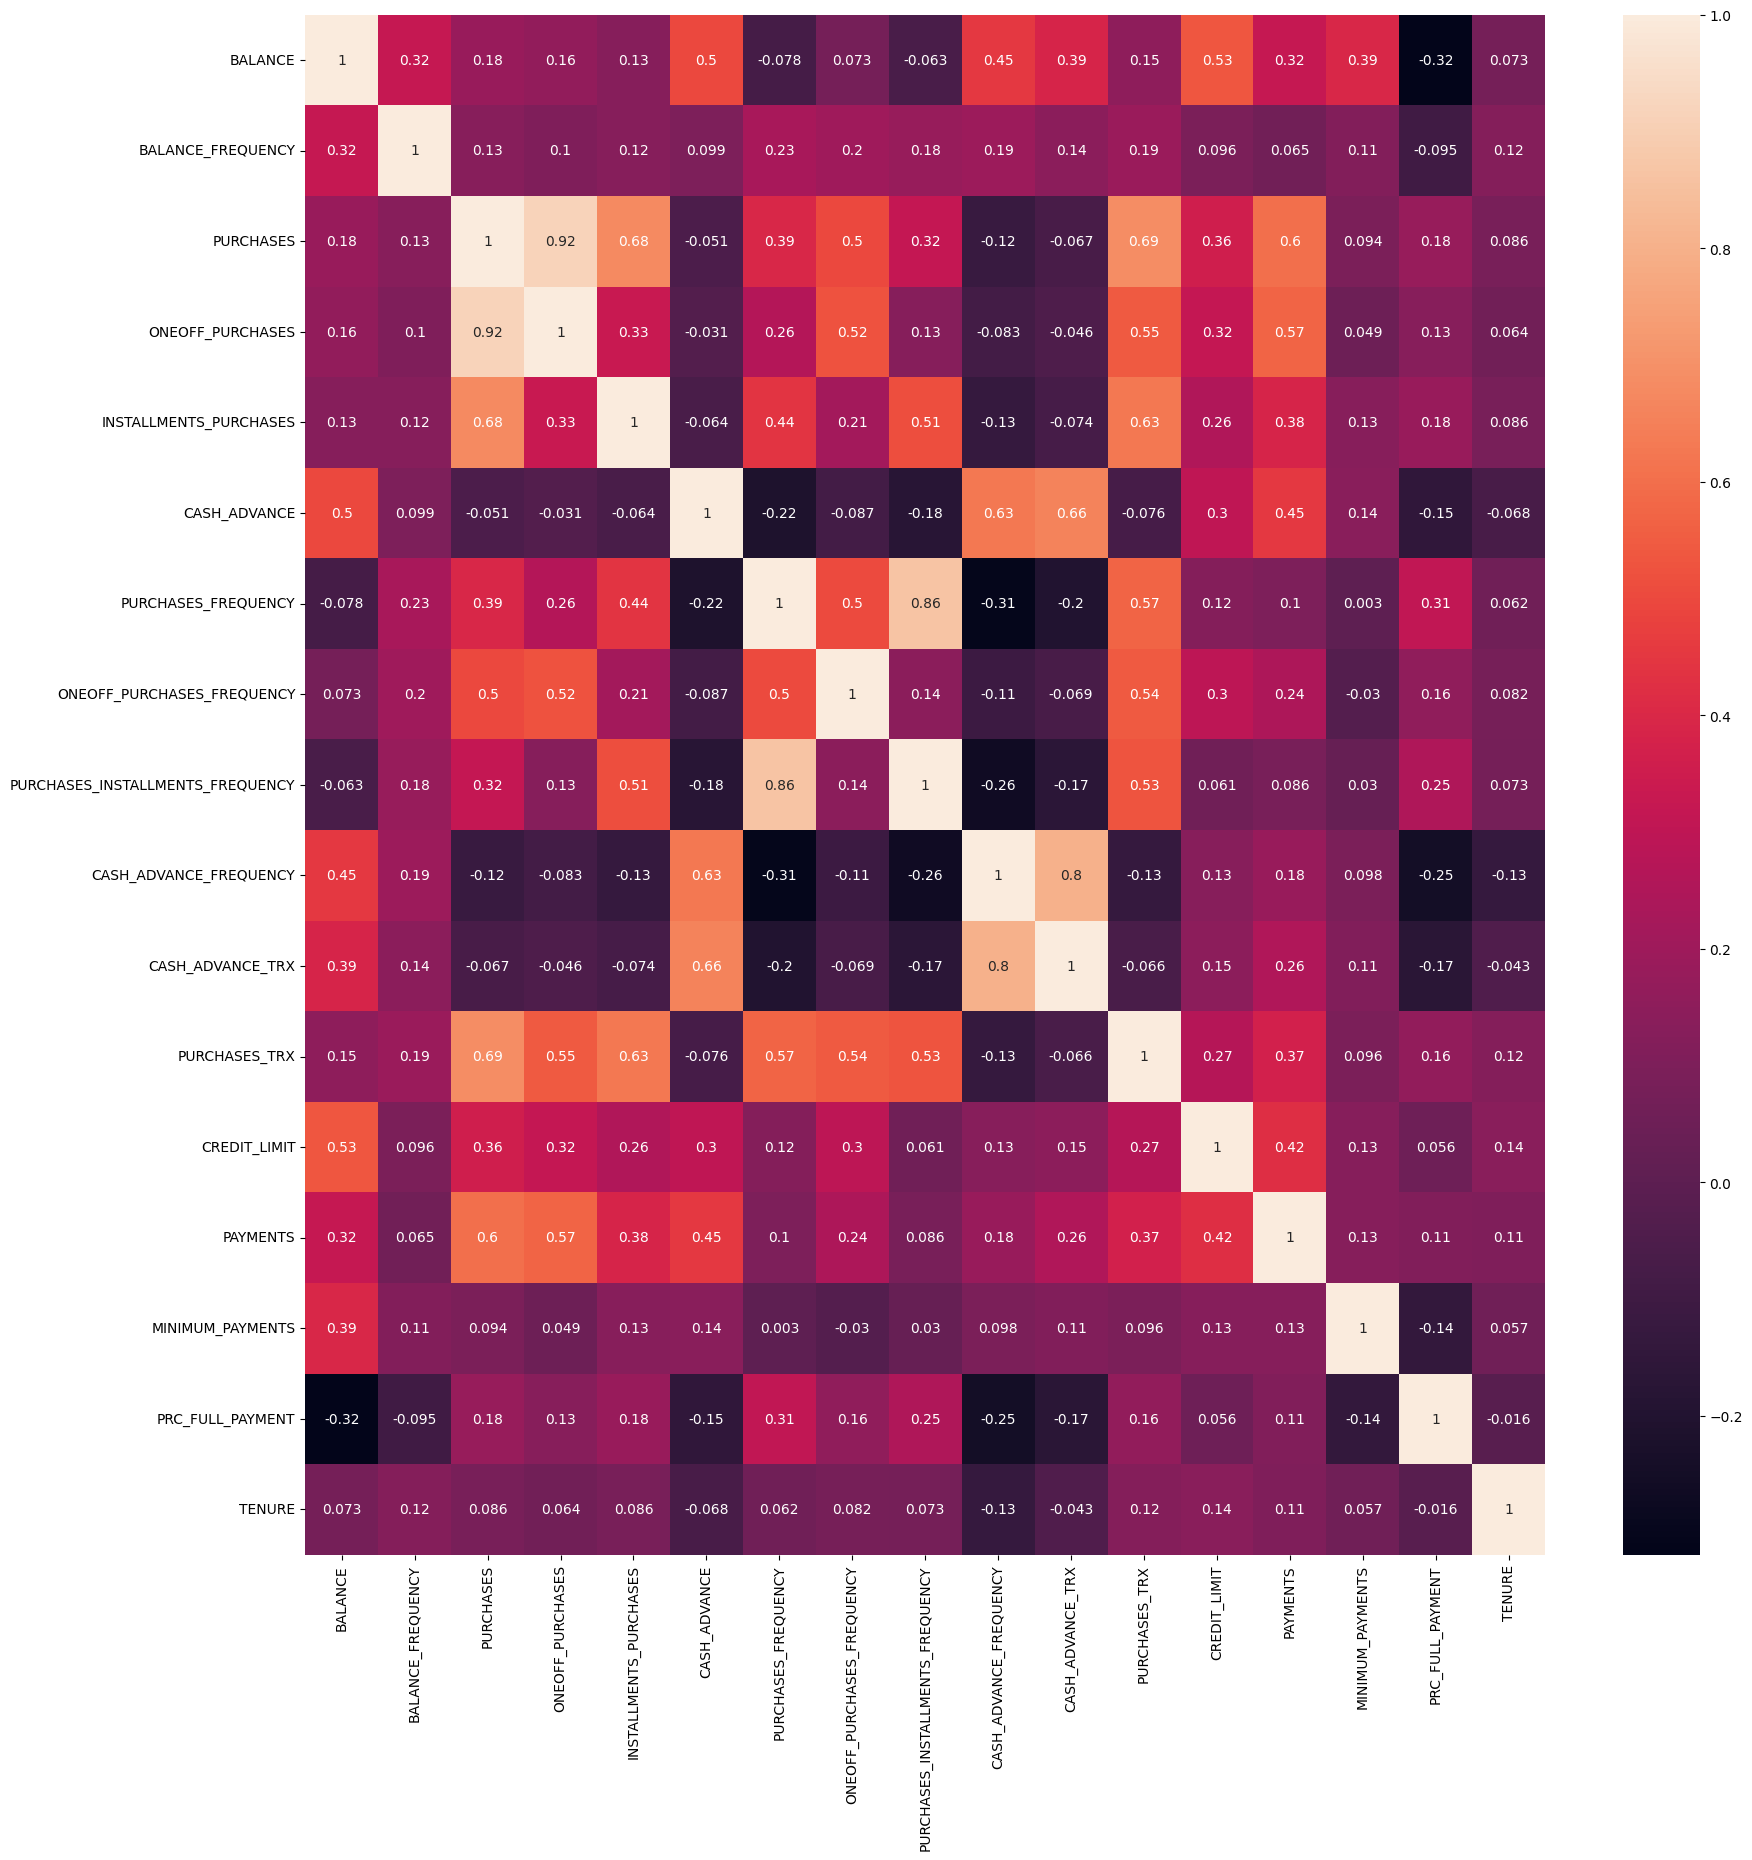

In [24]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations , annot=True)


# **Definição do número de Clusters Usando o Elbow Method**

In [25]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [26]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [27]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [28]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [29]:
wcss_1 = []
range_values = range(1 , 20 )
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [30]:
print(wcss_1)

[152149.99999999983, 127785.04965248298, 111986.69806610125, 99074.3704938636, 91503.39081843363, 84875.59728313533, 79527.55116530054, 75568.72661188772, 69851.80461186357, 66461.11615447678, 63664.437396805806, 61353.591266942785, 59147.998797915534, 57504.478542636876, 55924.800375117644, 54537.320703984384, 53277.93229176426, 52006.01340279336, 50999.93369529369]


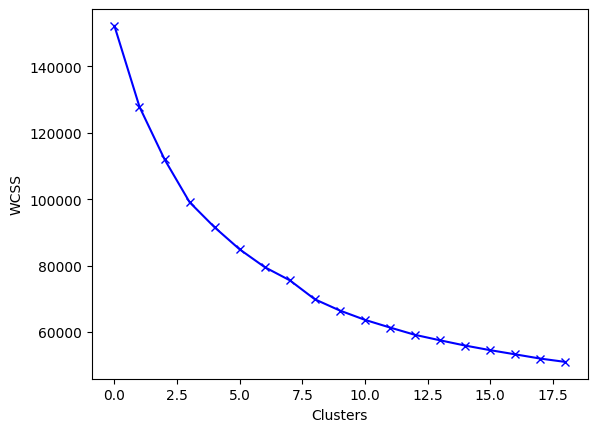

In [31]:
# Grafico
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

# **Agrupamento com K-means**

In [32]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
labels, len(labels)

(array([1, 3, 4, ..., 7, 7, 7], dtype=int32), 8950)

In [34]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1182, 2746, 2025,  872, 1118,   24,  359,  624]))

In [35]:
kmeans.cluster_centers_

array([[-7.01215453e-01, -2.13940879e+00, -3.10201645e-01,
        -2.34618979e-01, -3.02315577e-01, -3.22522194e-01,
        -5.54262413e-01, -4.41259119e-01, -4.40150257e-01,
        -5.21633654e-01, -3.76395640e-01, -4.19230091e-01,
        -1.76045175e-01, -2.01790324e-01, -2.57017593e-01,
         2.83848753e-01,  2.01369241e-01],
       [ 1.34800035e-02,  4.03808866e-01, -3.57426129e-01,
        -2.41706128e-01, -4.00960564e-01, -9.44711714e-02,
        -8.55216177e-01, -3.94727795e-01, -7.56890398e-01,
         1.04033260e-01, -2.81343414e-02, -4.82269973e-01,
        -3.04412260e-01, -2.50283146e-01, -1.11023665e-02,
        -4.55493173e-01,  2.73297242e-01],
       [-3.63877864e-01,  3.32970593e-01, -3.57042343e-02,
        -2.41338851e-01,  3.58769869e-01, -3.62744230e-01,
         9.88687514e-01, -3.80796490e-01,  1.19945984e+00,
        -4.73523467e-01, -3.60200844e-01,  1.87095059e-01,
        -2.58903330e-01, -2.14982927e-01, -5.20637221e-02,
         3.10841232e-01,  2.5

In [36]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701215,-2.139409,-0.310202,-0.234619,-0.302316,-0.322522,-0.554262,-0.441259,-0.440150,-0.521634,-0.376396,-0.419230,-0.176045,-0.201790,-0.257018,0.283849,0.201369
1,0.013480,0.403809,-0.357426,-0.241706,-0.400961,-0.094471,-0.855216,-0.394728,-0.756890,0.104033,-0.028134,-0.482270,-0.304412,-0.250283,-0.011102,-0.455493,0.273297
2,-0.363878,0.332971,-0.035704,-0.241339,0.358770,-0.362744,0.988688,-0.380796,1.199460,-0.473523,-0.360201,0.187095,-0.258903,-0.214983,-0.052064,0.310841,0.256671
3,1.681960,0.392442,-0.218581,-0.155669,-0.230907,2.012439,-0.475587,-0.209021,-0.416062,1.917159,1.923960,-0.268192,1.027722,0.820988,0.524529,-0.389946,0.070181
4,-0.135252,0.400528,0.543300,0.673489,0.047125,-0.330997,0.981760,1.910058,0.171252,-0.412684,-0.329665,0.621477,0.432631,0.146469,-0.158365,0.447359,0.268444
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,1.057179,0.465598,2.473613,1.778750,2.580951,-0.161134,1.165969,1.534095,1.276323,-0.284558,-0.151568,3.097606,1.290619,1.419466,0.738288,0.243059,0.337784
7,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889


- Grupo 0 (VIP/Prime): limite do cartão alto (17144) e o mais alto percentual de pagamento da fatura completa (0.21). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (101) e não sacam muito dinheiro do limite do cartão (131). 21% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (3640) e sacam muito dinheiro do cartão de crédito (5246), compram  (0.8) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)

In [37]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.954052,0.370465,340.454239,203.017919,137.687420,302.527006,0.267898,0.070822,0.189510,0.030760,0.680203,4.289340,3853.925080,1148.980637,265.237883,0.236736,11.786802
1,1592.532317,0.972929,239.558401,191.254703,48.483982,780.760653,0.147111,0.084703,0.063630,0.155962,3.056831,2.722404,3386.873103,1008.598669,838.332946,0.020491,11.883060
2,807.093769,0.956148,926.922187,191.864309,735.498786,218.179516,0.887159,0.088859,0.841133,0.040387,0.790721,19.360316,3552.453209,1110.789343,742.874234,0.244630,11.860809
3,5065.332685,0.970237,536.202718,334.058131,202.261181,5199.049587,0.299475,0.140103,0.199083,0.518787,16.378440,8.043578,8233.720809,4109.823184,2086.599585,0.039662,11.611239
4,1282.959456,0.972152,2163.972782,1710.290581,453.682200,284.754342,0.884378,0.772265,0.432497,0.052562,0.999106,30.157424,6068.539600,2157.157040,495.143908,0.284560,11.876565
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,3764.902698,0.987566,6288.116435,3544.797939,2744.989805,640.966451,0.958310,0.660108,0.871681,0.078201,2.214485,91.704735,9190.250696,5842.360167,2584.755006,0.224805,11.969359
7,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372


In [38]:
labels,len(labels)

(array([1, 3, 4, ..., 7, 7, 7], dtype=int32), 8950)

In [39]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


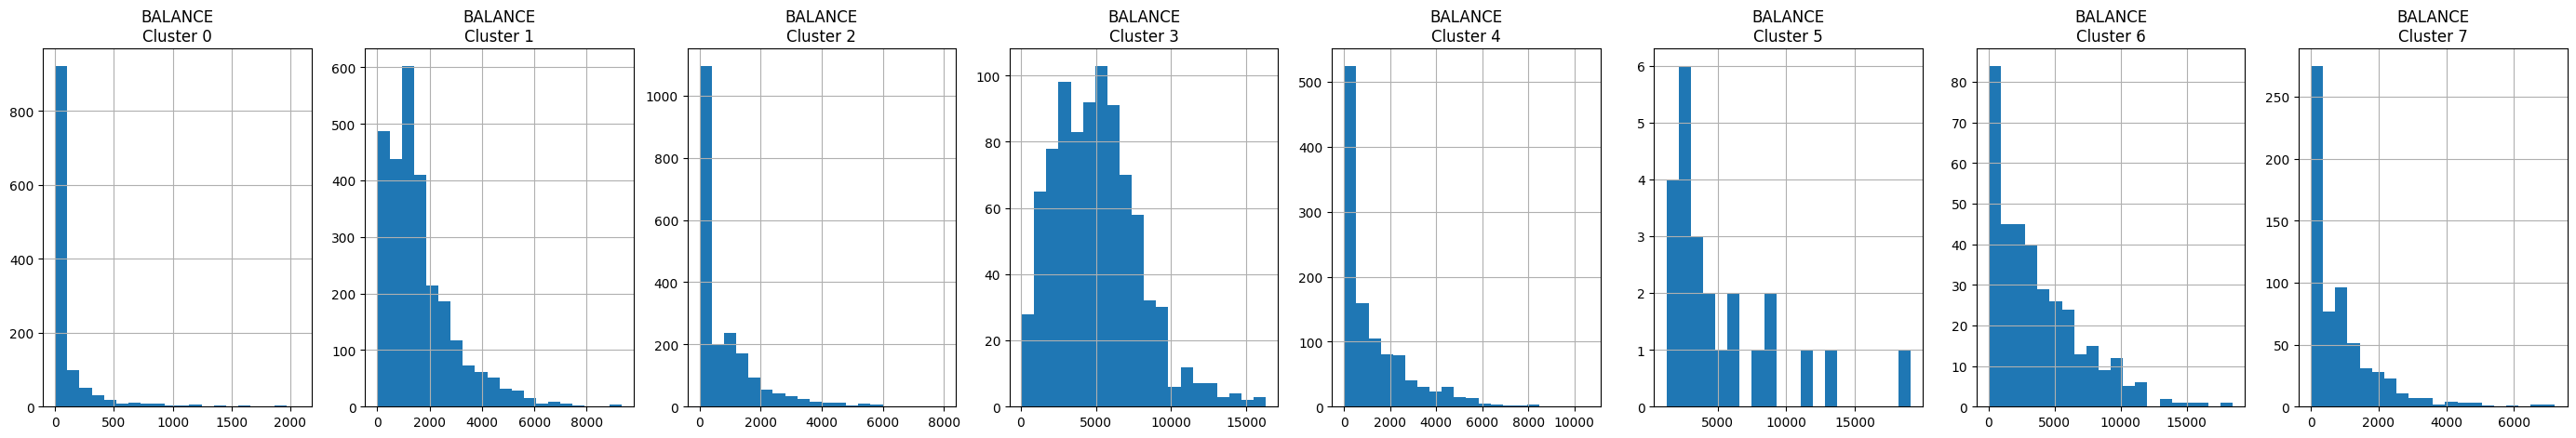

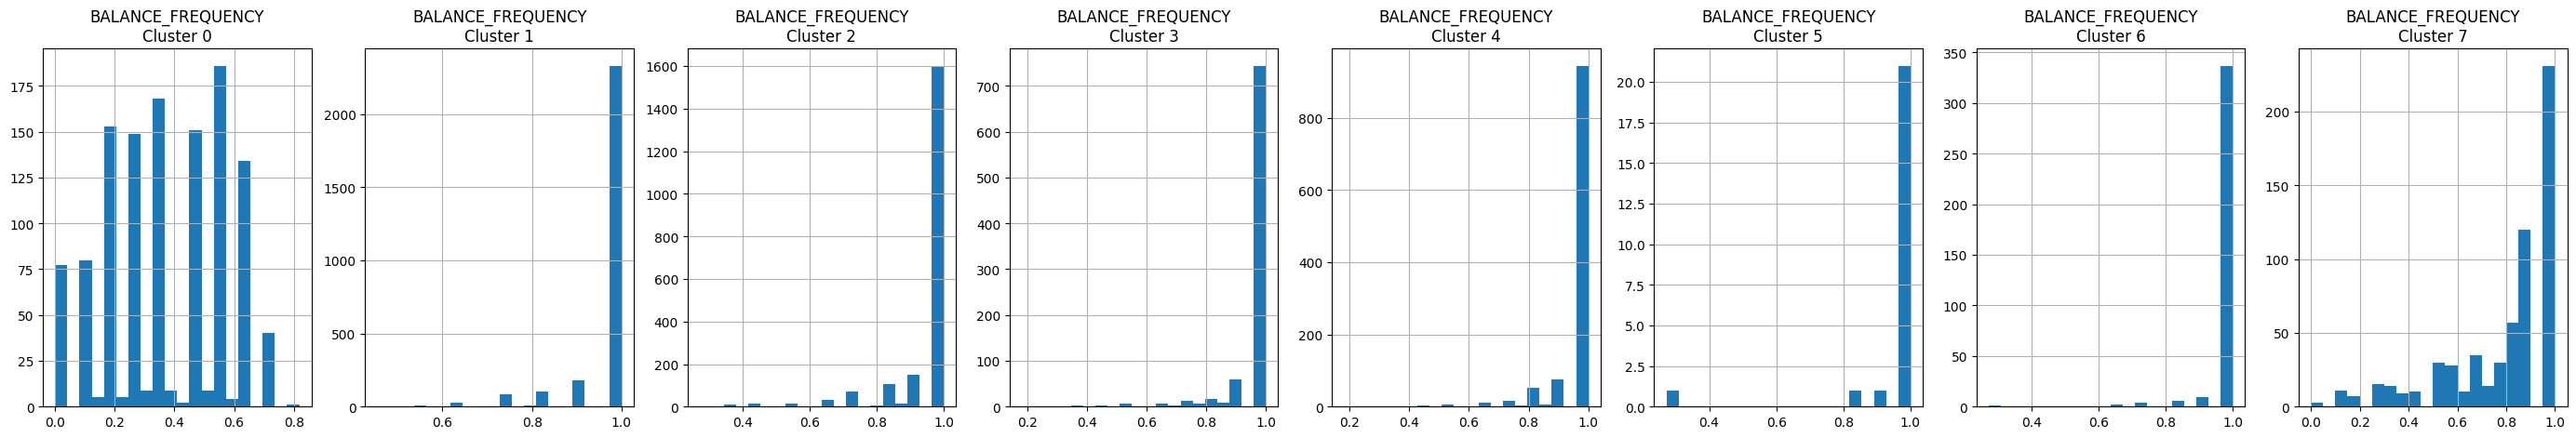

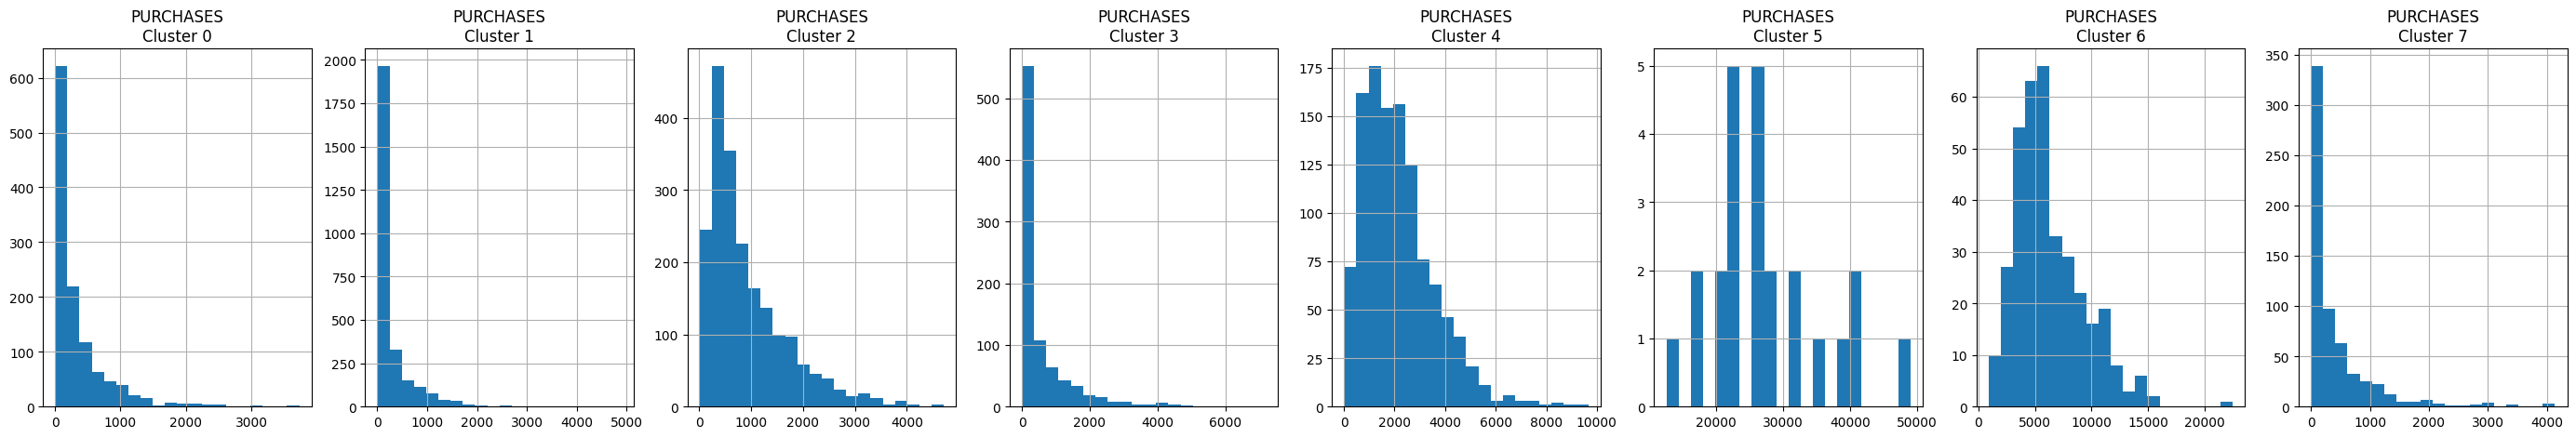

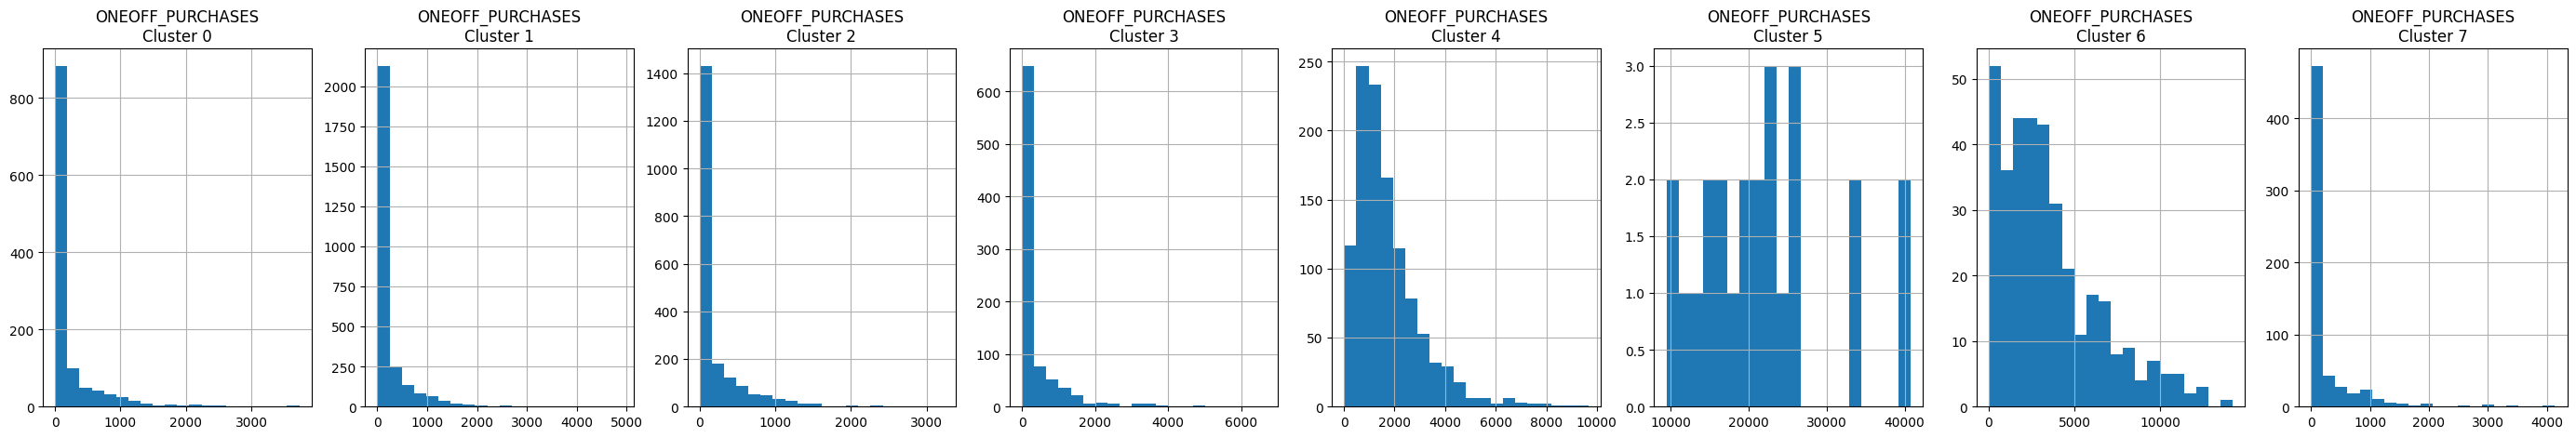

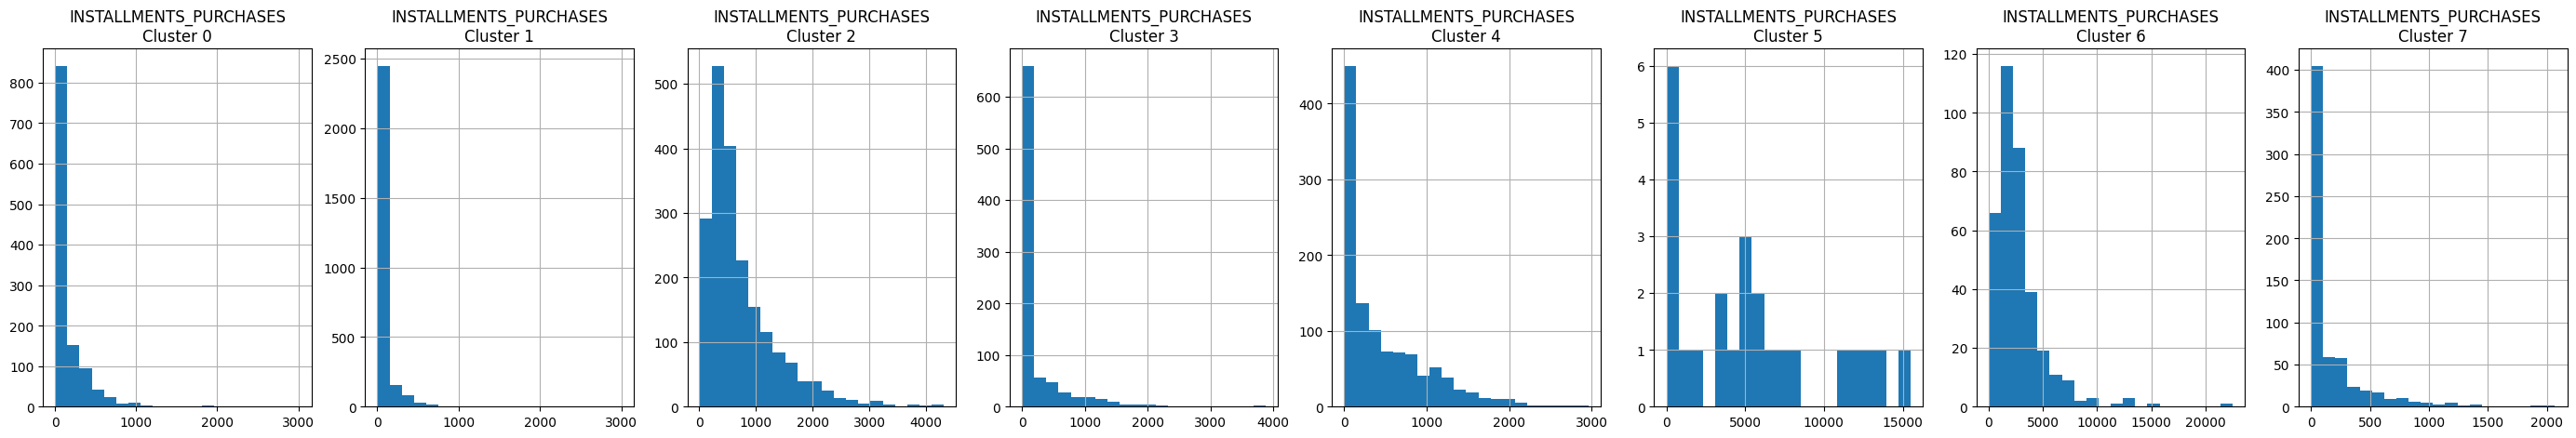

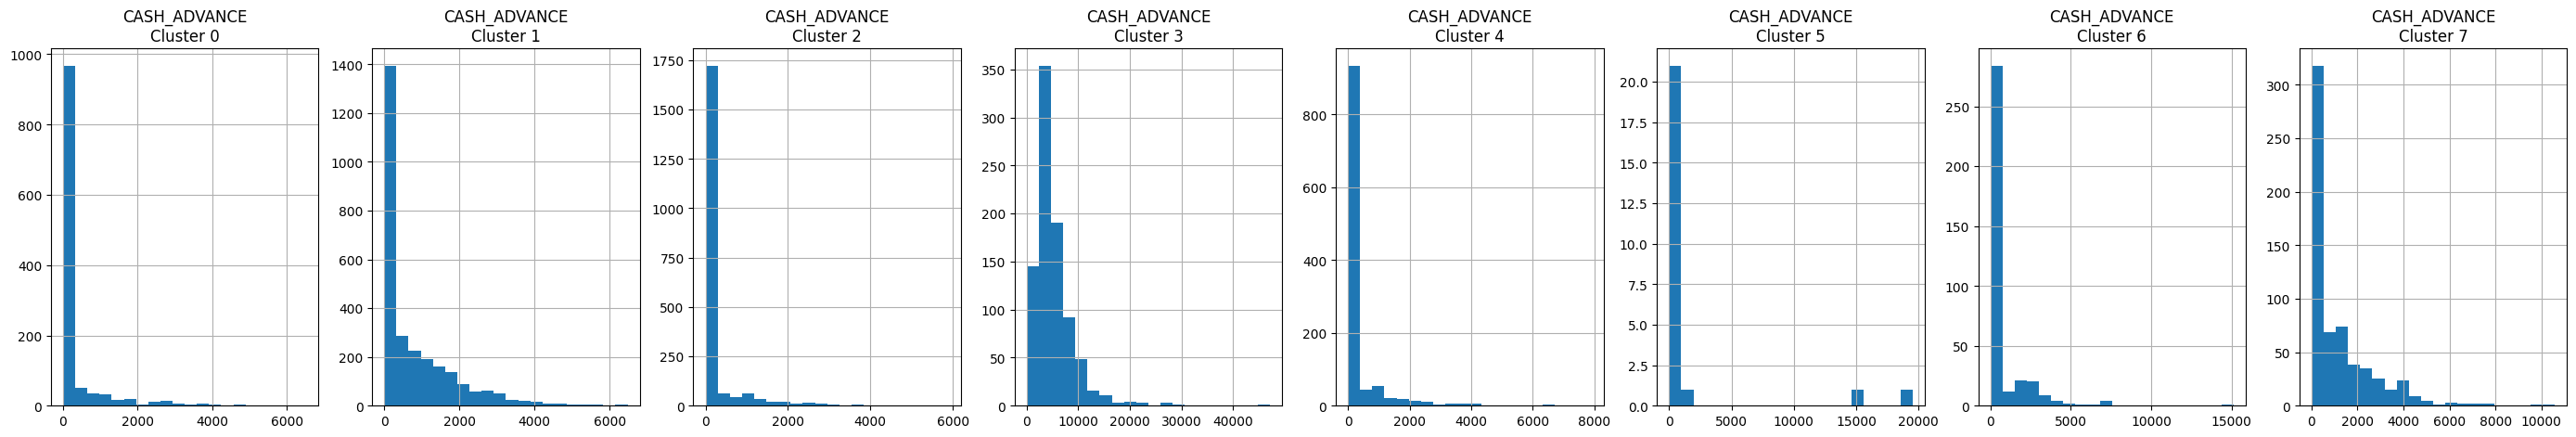

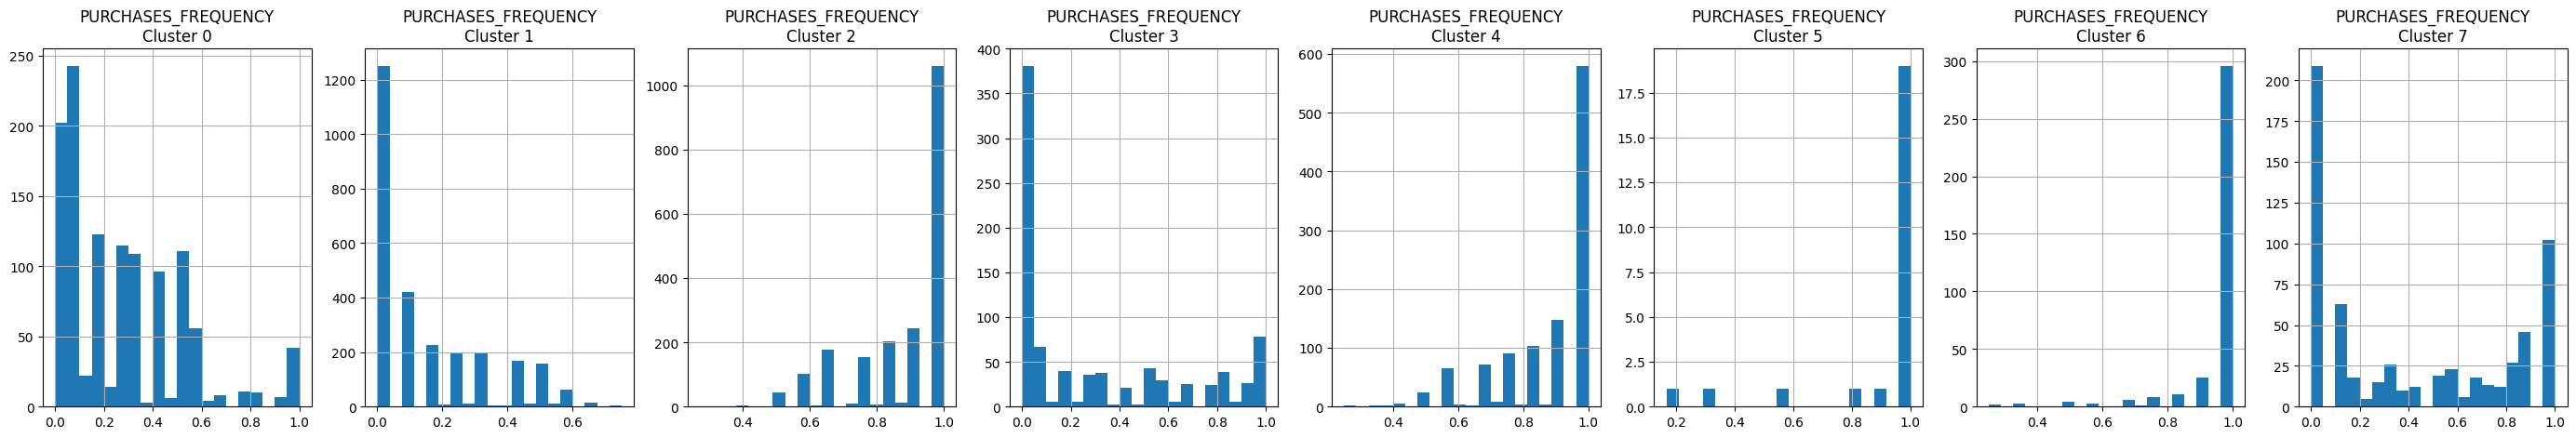

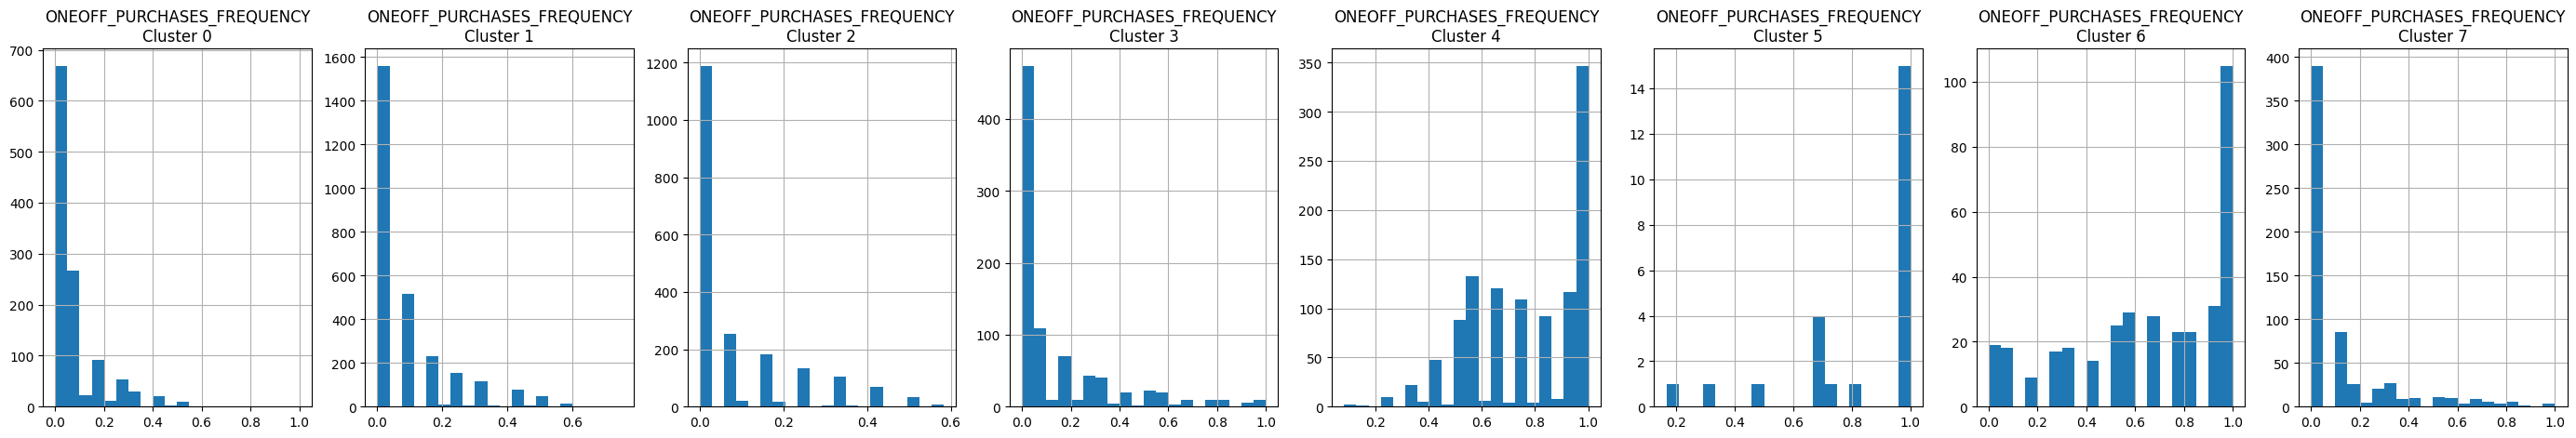

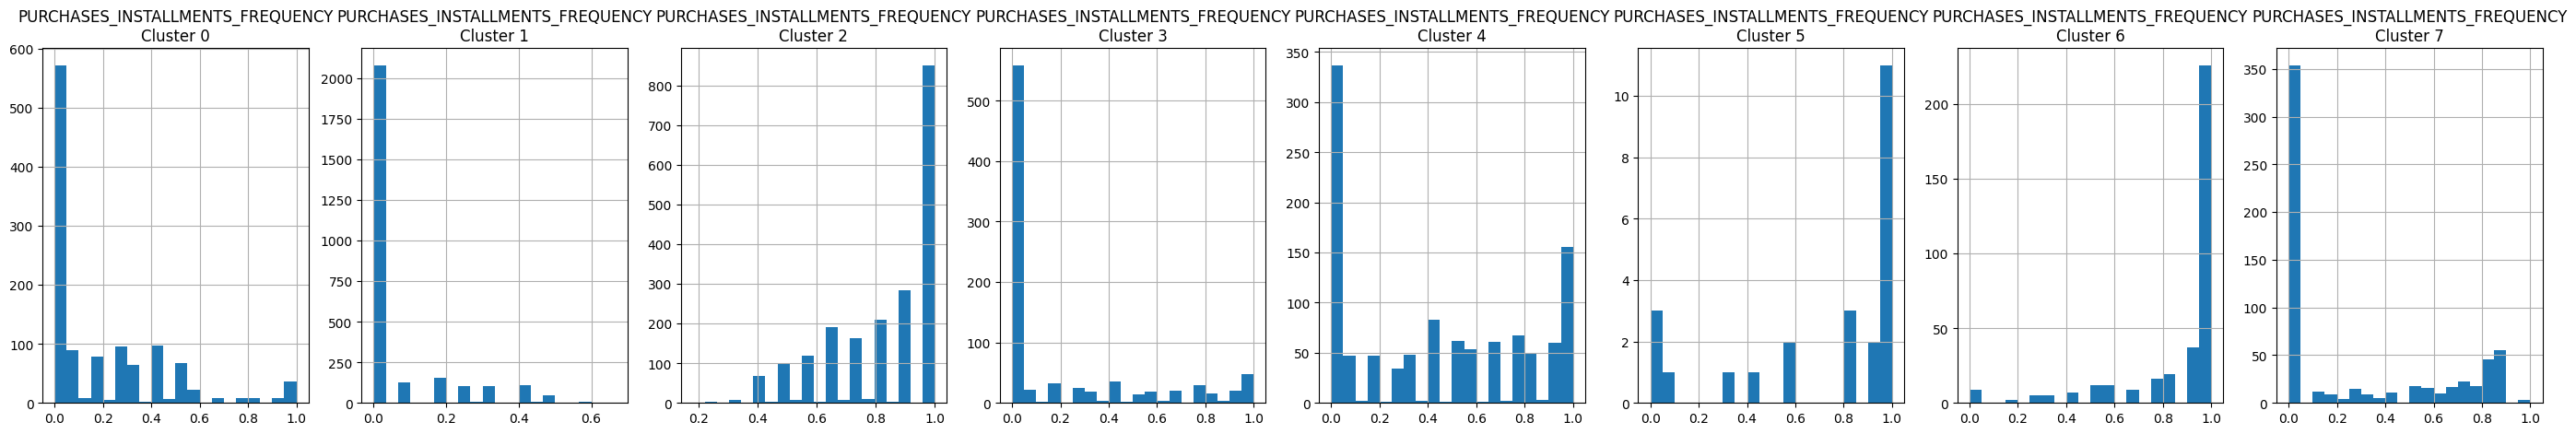

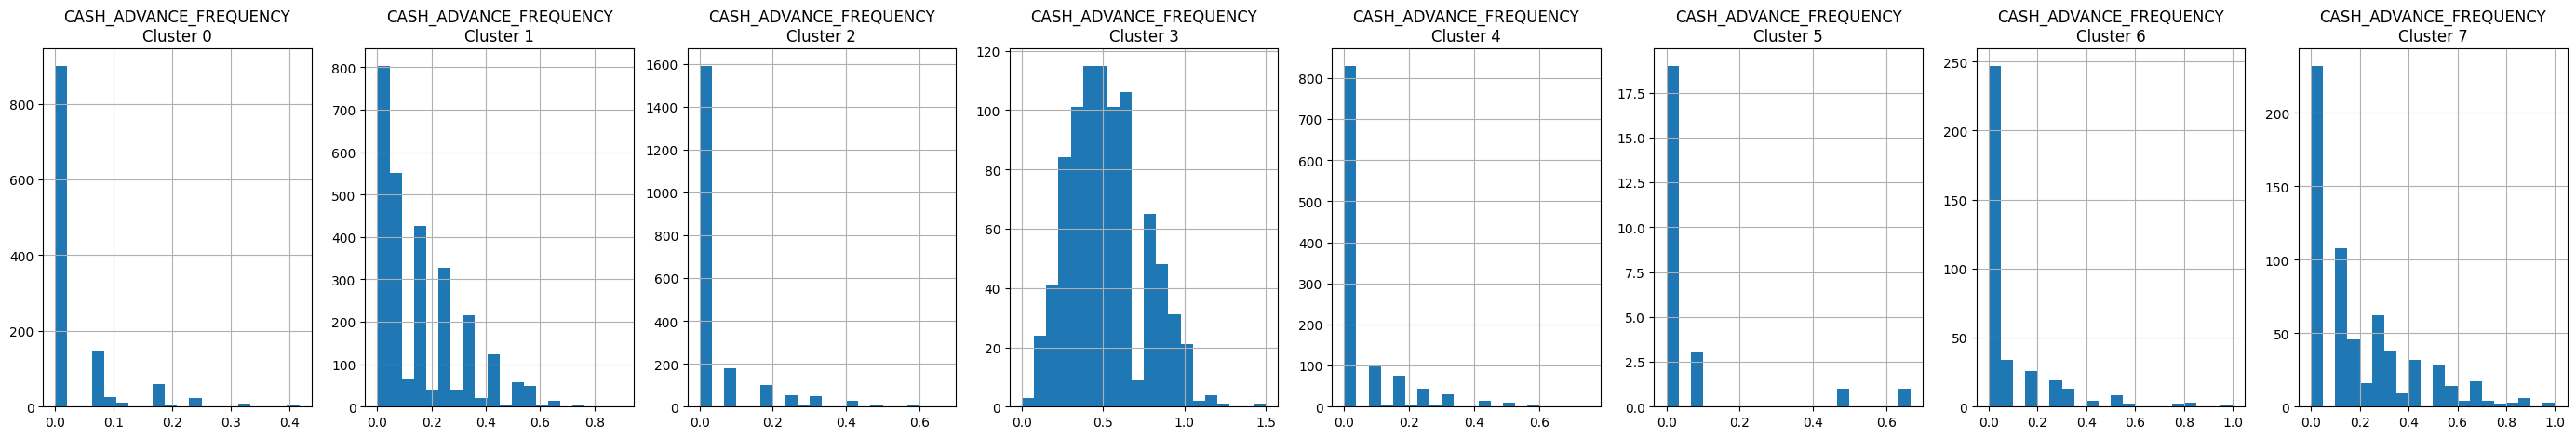

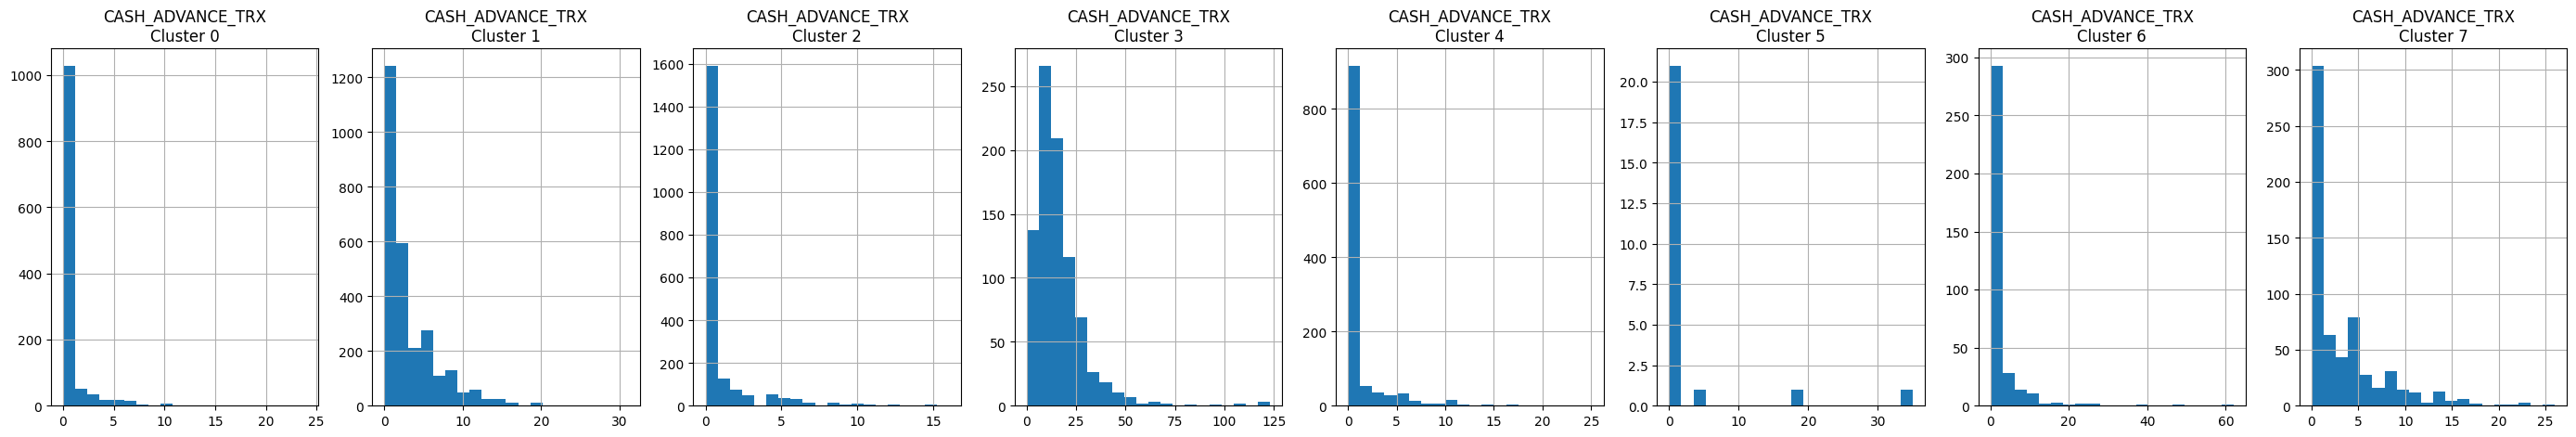

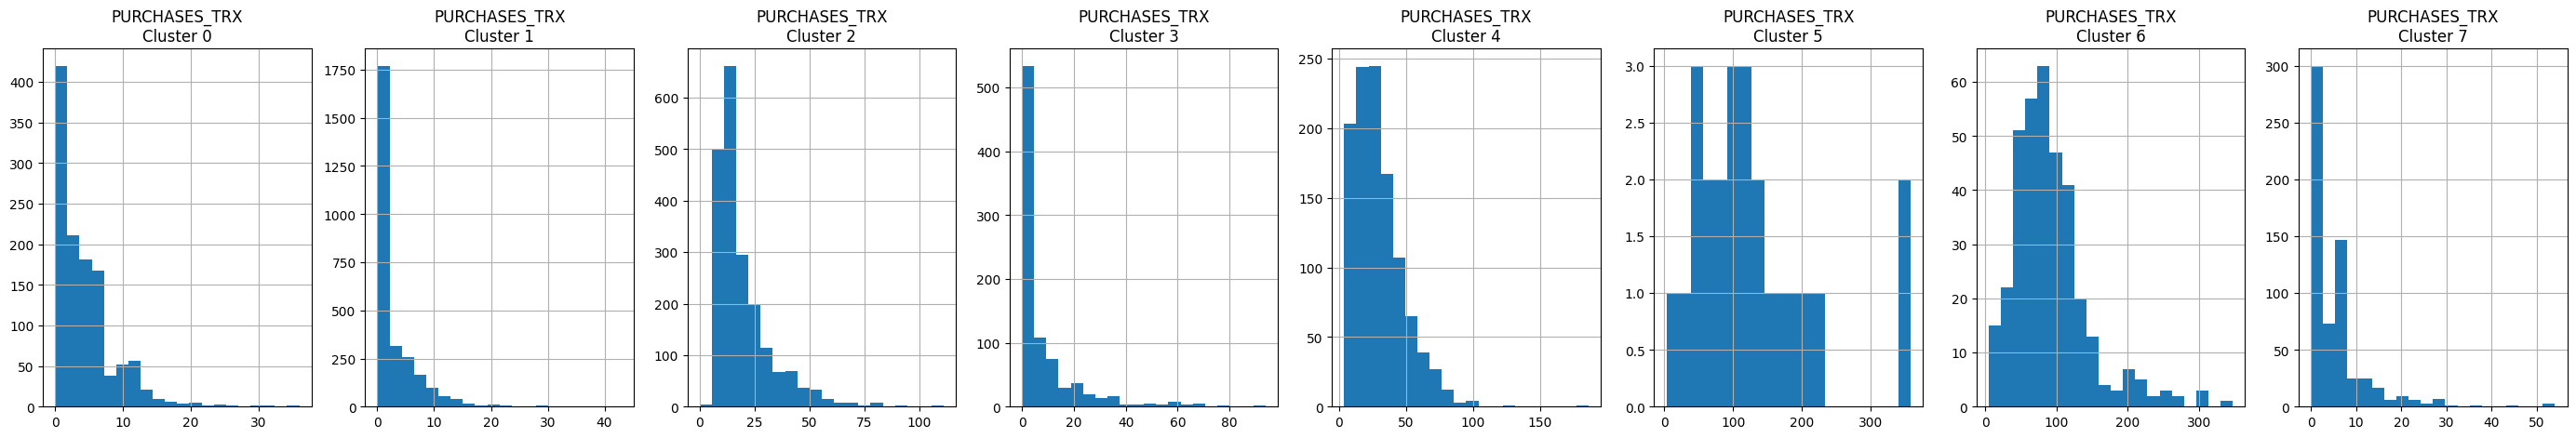

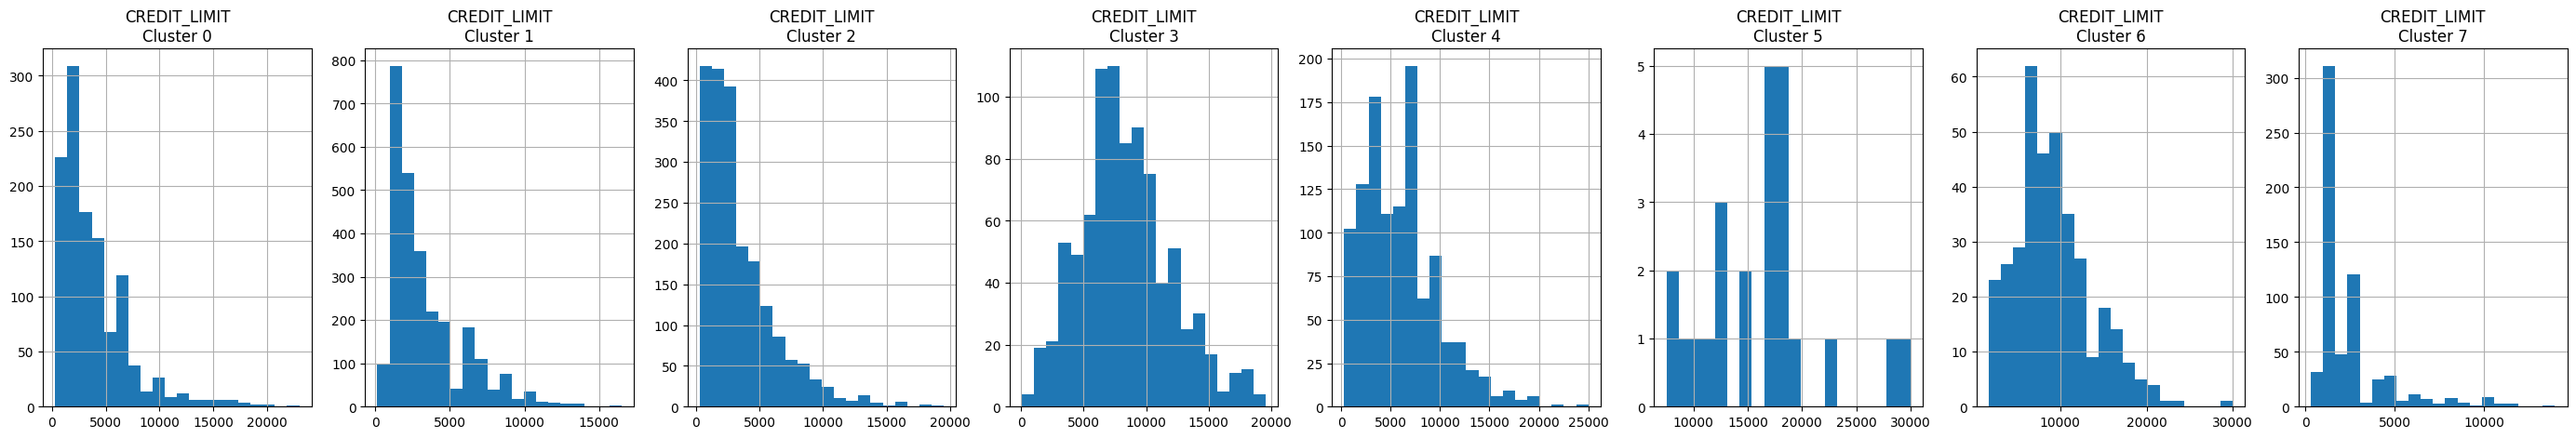

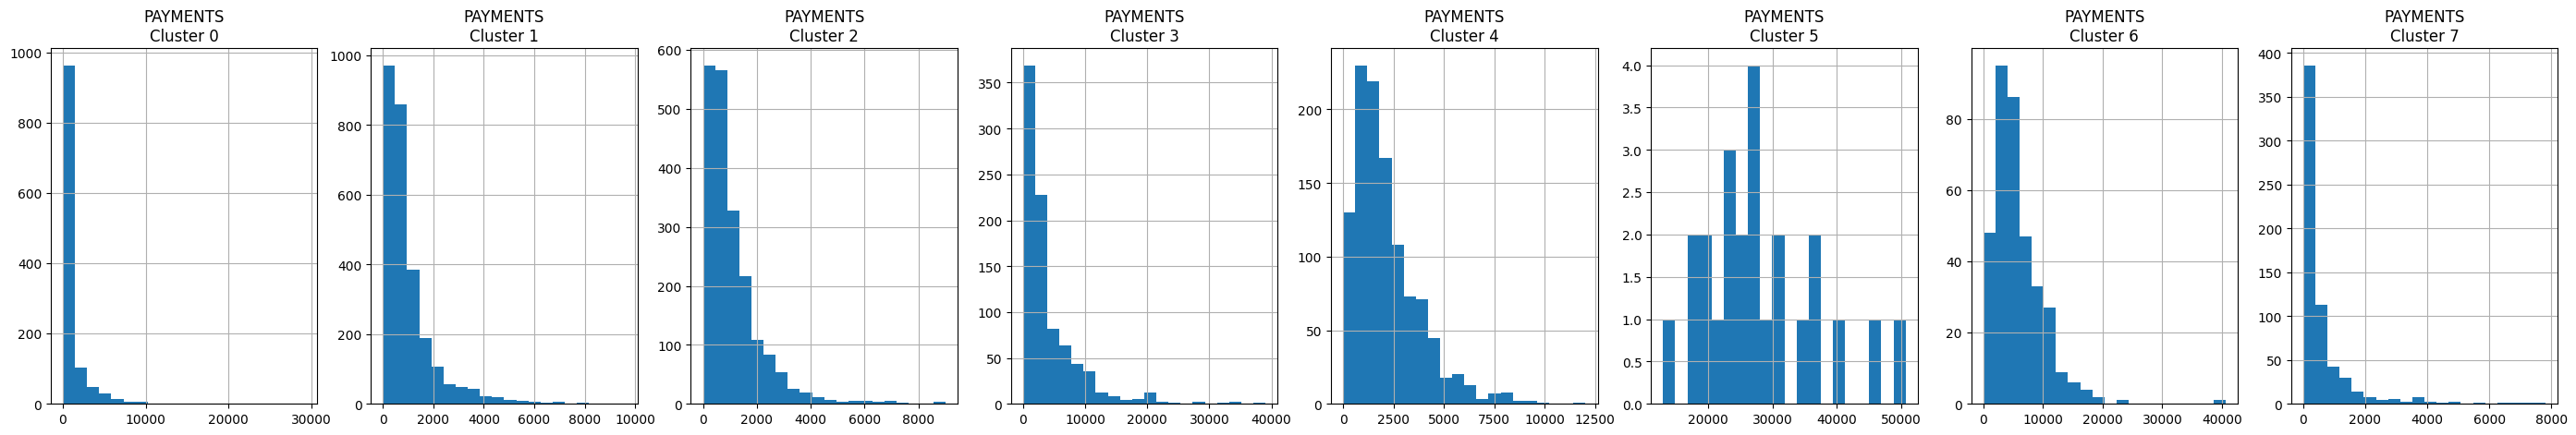

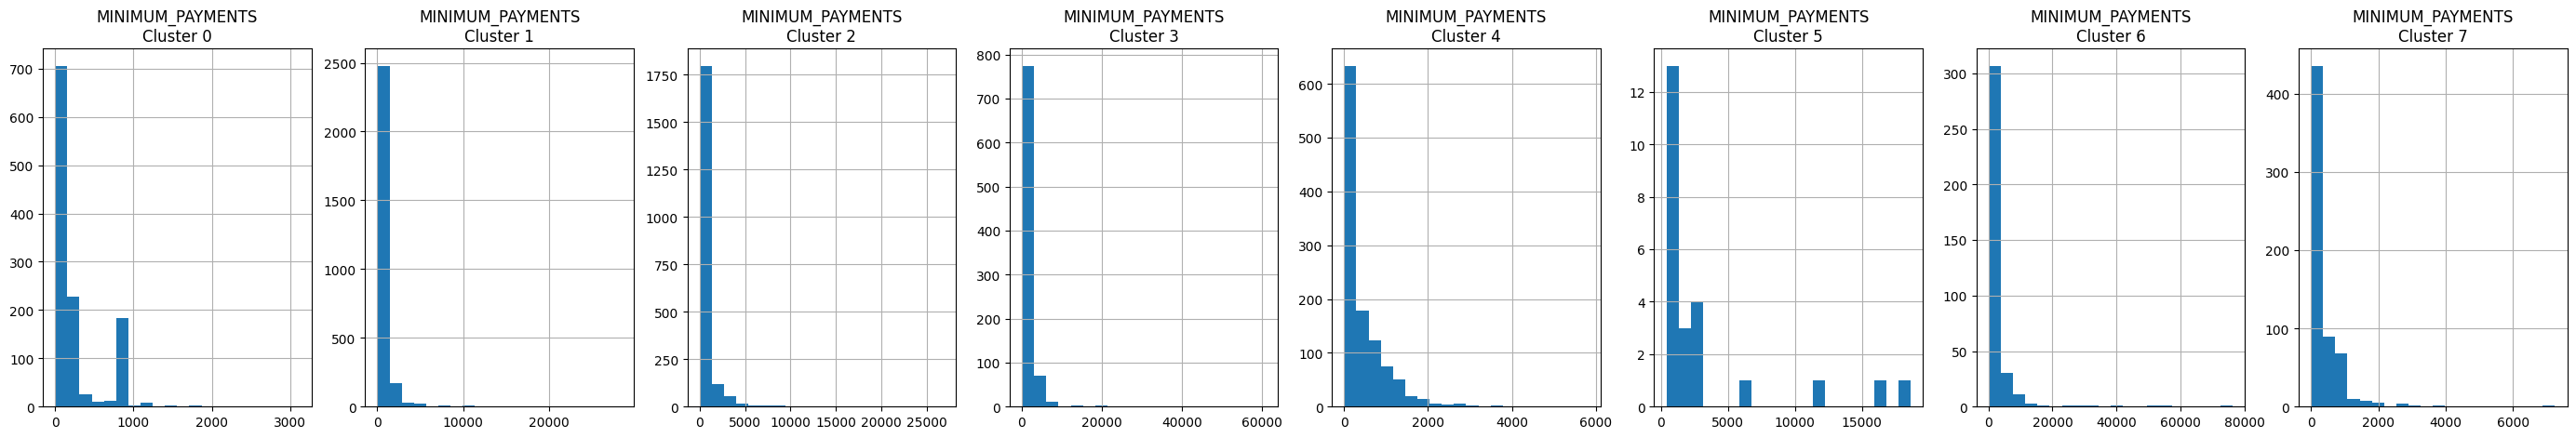

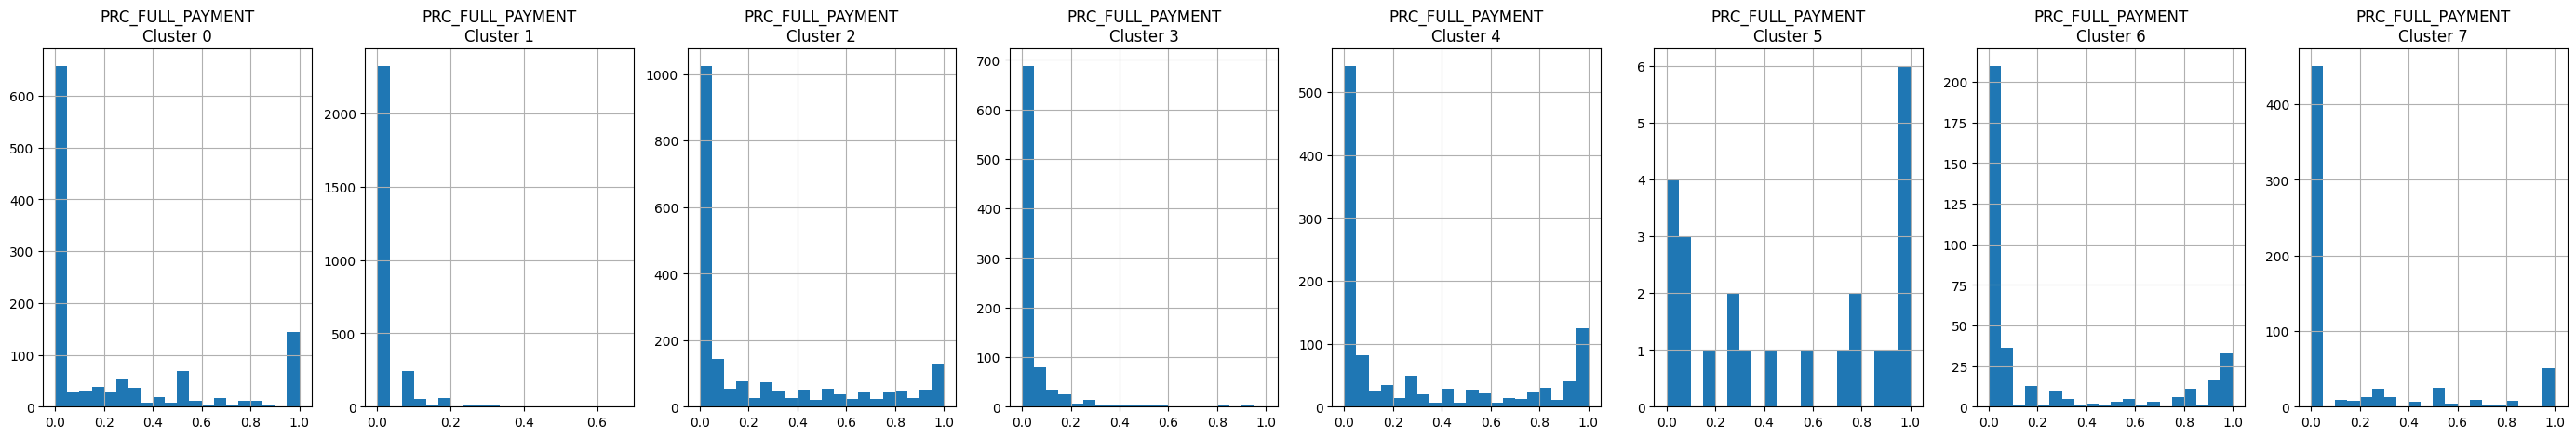

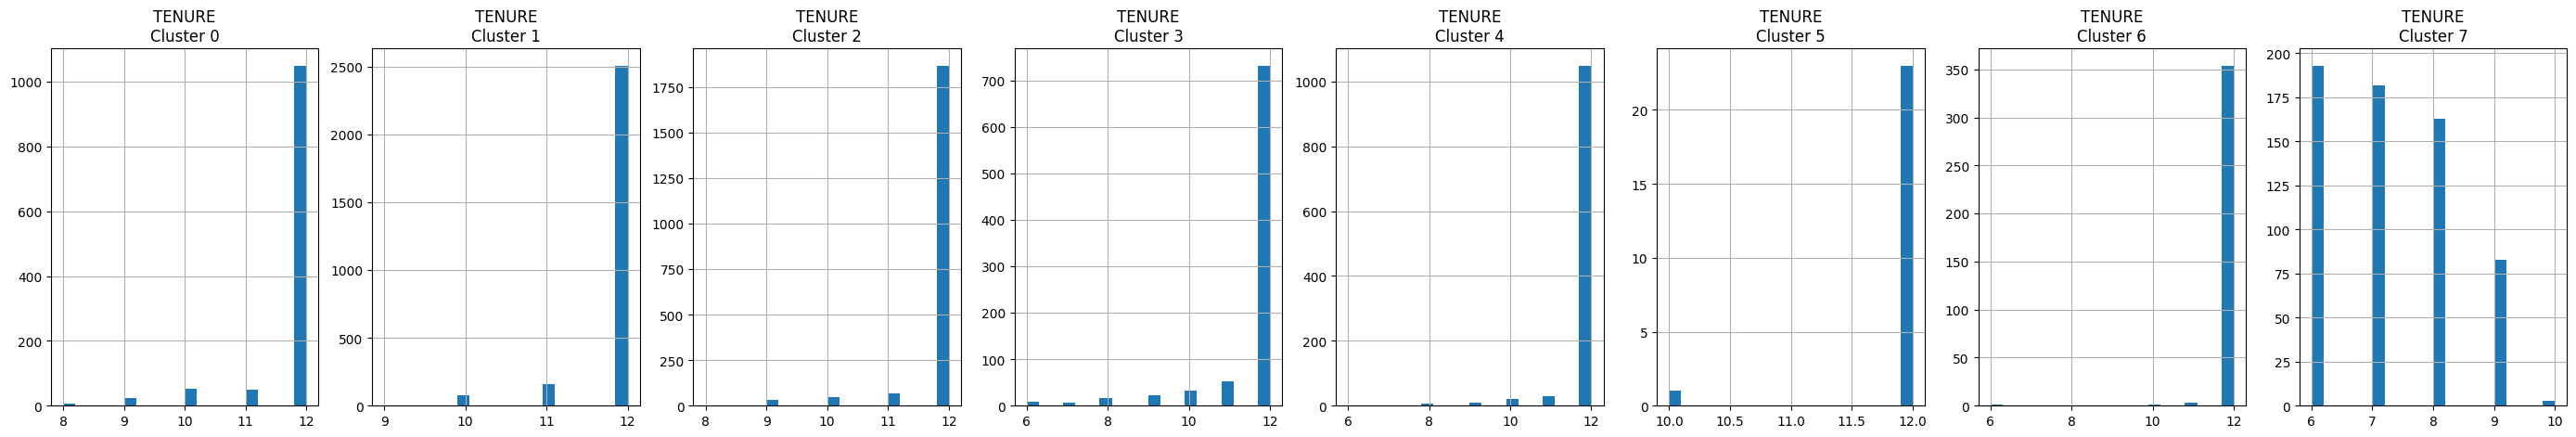

In [41]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {}'.format(i,j))
  plt.show()

In [42]:
credit_ordered = creditcard_df_cluster.sort_values(by='cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3009,381.959463,0.545455,1013.60,1013.6,0.00,476.74727,0.166667,0.166667,0.000000,0.083333,1,12,3500.0,2246.428764,103.601608,0.000000,12,0
4201,18.558992,0.545455,86.40,0.0,86.40,0.00000,0.333333,0.000000,0.333333,0.000000,0,4,2000.0,265.768812,177.572305,0.000000,12,0
6721,82.902896,0.727273,430.43,0.0,430.43,0.00000,0.500000,0.000000,0.416667,0.000000,0,10,2500.0,315.075002,87.824996,0.083333,12,0
6731,92.261256,0.272727,666.68,0.0,666.68,0.00000,0.333333,0.000000,0.333333,0.000000,0,4,900.0,2510.558599,259.141203,0.000000,12,0
1097,6.338717,0.090909,171.00,171.0,0.00,0.00000,0.166667,0.166667,0.000000,0.000000,0,2,4000.0,495.808559,88.232737,0.000000,12,0


In [43]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5685,6.542818,0.571429,178.00,0.00,178.0,0.000000,0.857143,0.000000,0.571429,0.000000,0,6,1500.0,231.111728,19.703002,0.0,7,7
5712,1219.143484,0.666667,0.00,0.00,0.0,1893.219765,0.000000,0.000000,0.000000,0.500000,3,0,2000.0,204.789406,274.065414,0.0,6,7
8447,231.422388,0.875000,822.93,822.93,0.0,0.000000,0.375000,0.375000,0.000000,0.000000,0,12,1200.0,120.912757,122.220568,0.0,8,7
5661,1706.846933,0.857143,1000.00,1000.00,0.0,2022.361360,0.142857,0.142857,0.000000,0.714286,13,1,2500.0,862.833252,233.053173,0.0,7,7
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [44]:
credit_ordered.to_csv('cluster.csv')

# **Aplicação do PCA(principal component analysis) e visualização dos resultados**

In [45]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221859, -1.07645193],
       [-1.13829042,  2.50650282],
       [ 0.96967843, -0.38351278],
       ...,
       [-0.92620273, -1.81080067],
       [-2.33654918, -0.65798559],
       [-0.55642467, -0.40046604]])

In [54]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076452
1,-1.138290,2.506503
2,0.969678,-0.383513
3,-0.873626,0.043172
4,-1.599433,-0.688586


In [55]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076452,1
1,-1.138290,2.506503,3
2,0.969678,-0.383513,4
3,-0.873626,0.043172,1
4,-1.599433,-0.688586,1


<Axes: xlabel='pca1', ylabel='pca2'>

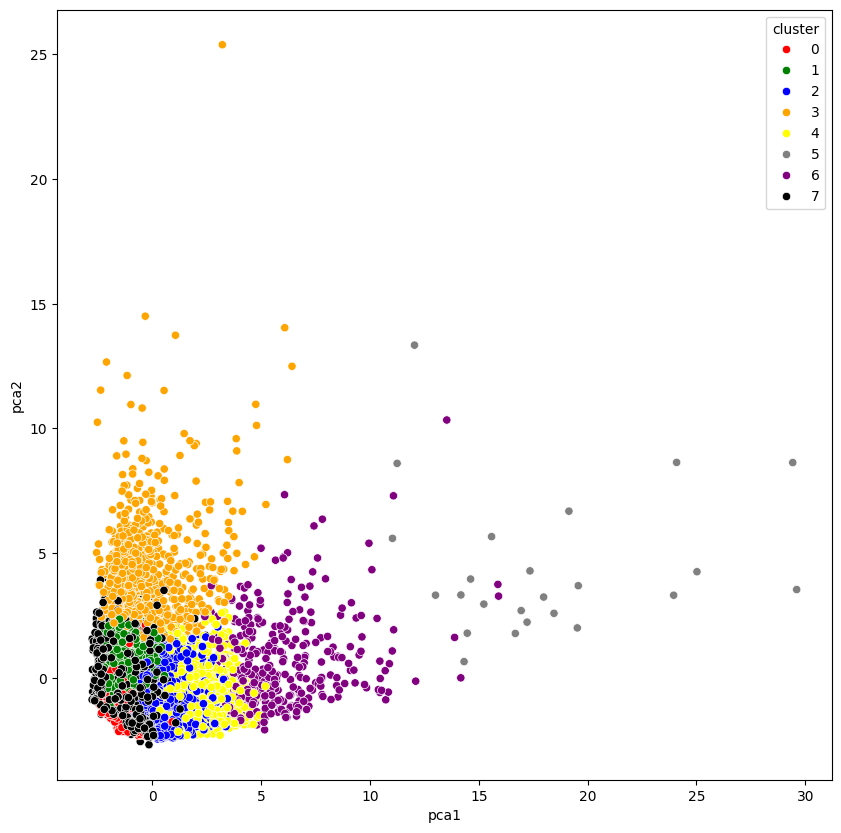

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2',hue = 'cluster', data = pca_df, palette=['red', 'green', 'blue', 'orange', 'yellow', 'gray', 'purple', 'black'])

# **Aplicação de Autoencoders**

In [ ]:
# 18 -> 10
# Elbow
# k-means
# PCA

In [57]:
creditcard_df_scaled.shape

(8950, 17)

In [58]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [59]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [60]:
# autoencoder
autoencoder = Model(input_df,decoded)

In [61]:
# encoder
encoder = Model(input_df, encoded)

In [62]:
autoencoder.compile(optimizer= "Adam", loss='mean_squared_error')

In [63]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs=50)

Epoch 1/50
280/280 [==============================] - 9s 29ms/step - loss: 0.1859
Epoch 2/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0622
Epoch 3/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0572
Epoch 4/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0502
Epoch 5/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0417
Epoch 6/50
280/280 [==============================] - 12s 42ms/step - loss: 0.0501
Epoch 7/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0343
Epoch 8/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0405
Epoch 9/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0460
Epoch 10/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0261
Epoch 11/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0346
Epoch 12/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0232
Epoch 13/5

In [64]:
creditcard_df_scaled.shape


(8950, 17)

In [65]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 3s 9ms/step


In [66]:
compact.shape


(8950, 10)

In [67]:
compact[0]

array([0.64841557, 0.04326822, 0.7185486 , 0.39191228, 0.38949838,
       0.        , 0.19052787, 1.2900691 , 0.86732686, 0.06961517],
      dtype=float32)

In [68]:
wcss_2 = []
range_values = range(1 , 20 )
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

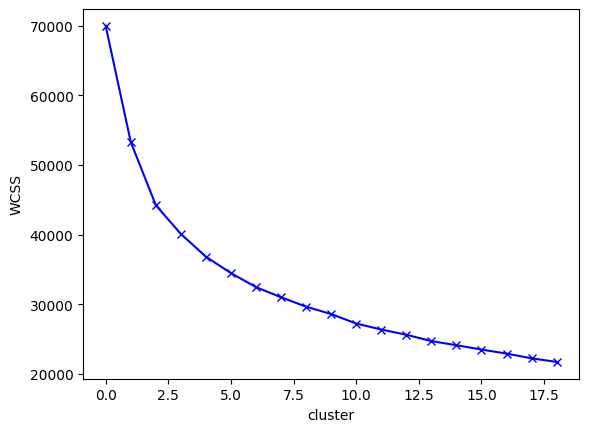

In [69]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('cluster')
plt.ylabel('WCSS');

<ipython-input-70-394146a65110>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color='r')
<ipython-input-70-394146a65110>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color='g');


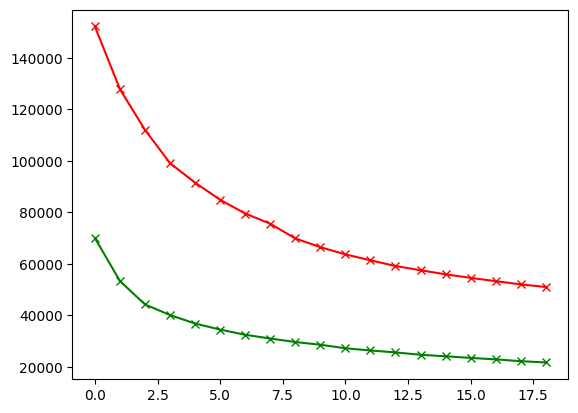

In [70]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g');

In [71]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [72]:
labels = kmeans.labels_
labels,labels.shape

(array([1, 1, 1, ..., 0, 0, 0], dtype=int32), (8950,))

In [73]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis= 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [74]:
df_cluster_at.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [76]:
df_cluster_at[df_cluster_at['cluster']==3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12,3
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,3
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12,3
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,3
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,3


In [77]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.153496,-0.203546
1,0.517481,-0.770233
2,-0.725830,0.476449
3,0.565728,-0.624962
4,-1.462452,0.026531


In [78]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.153496,-0.203546,1
1,0.517481,-0.770233,1
2,-0.725830,0.476449,1
3,0.565728,-0.624962,0
4,-1.462452,0.026531,1


<Axes: xlabel='pca1', ylabel='pca2'>

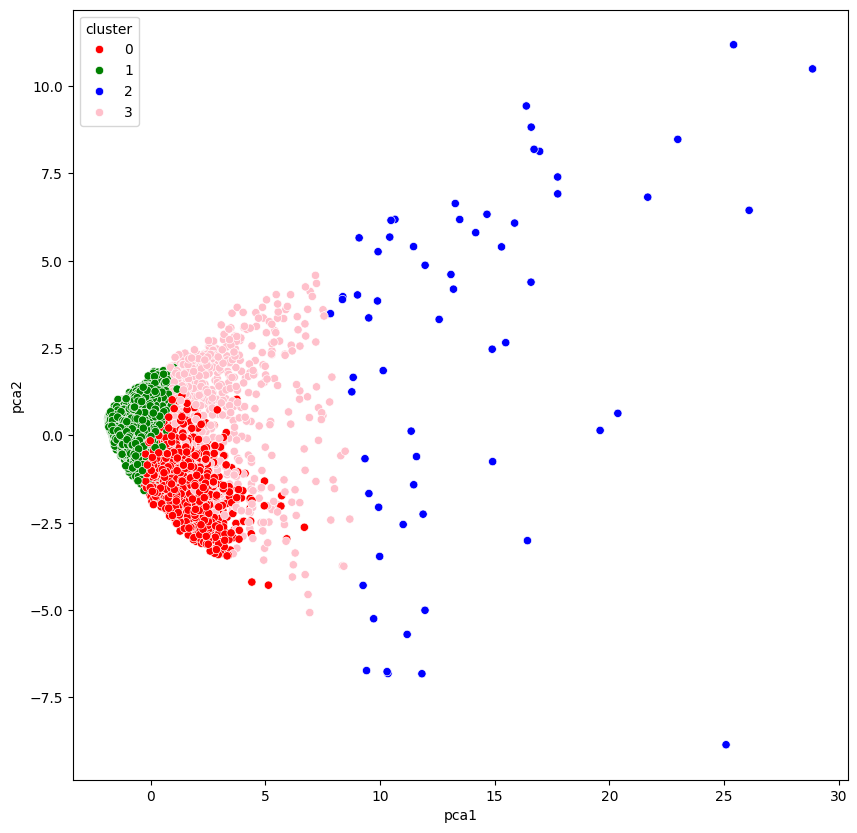

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [80]:
df_cluster_ordered = df_cluster_at.sort_values(by ='cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
6920,4.045339,0.363636,35.00,0.00,35.0,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,7500.0,122.129596,110.576473,0.250000,12,0
6922,0.737154,0.181818,427.50,0.00,427.5,0.000000,1.000000,0.000000,1.000000,0.000000,0,23,1500.0,443.007864,15.052203,0.111111,12,0
6923,98.935446,0.363636,1002.00,0.00,1002.0,0.000000,0.333333,0.000000,0.250000,0.000000,0,4,1500.0,1863.921412,171.566972,0.000000,12,0
2289,15.236618,0.272727,161.50,161.50,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,3000.0,912.737392,114.337421,0.000000,12,0


In [81]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3691,9630.367575,1.0,5245.28,2931.20,2314.08,0.000000,0.500000,0.500000,0.333333,0.000000,0,29,21000.0,5669.928467,2420.224884,0.0,12,3
1416,3308.148118,1.0,3767.75,160.00,3607.75,2567.221138,0.916667,0.083333,0.833333,0.083333,4,84,3000.0,3396.558042,4540.641433,0.0,12,3
1422,1245.890862,1.0,5380.30,3976.99,1403.31,0.000000,0.833333,0.500000,0.750000,0.000000,0,32,4500.0,6133.623121,442.215058,0.1,12,3
3695,5779.287938,1.0,5233.92,3277.47,1956.45,0.000000,1.000000,0.750000,1.000000,0.000000,0,61,6000.0,3555.592453,4277.740666,0.0,12,3
2416,1902.665938,1.0,4666.51,4464.76,201.75,4120.440840,0.916667,0.833333,0.500000,0.166667,10,46,7500.0,6153.484827,534.578893,0.0,12,3


In [87]:
df_cluster_ordered.to_excel('cluster_ordenado.xlsx')